<a href="https://colab.research.google.com/github/sreelekaa/Historical-Stock-Revenue-Data/blob/main/Historical_Stock_Revenue_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparative Stock and Revenue Analysis of Tesla and GameStop**

In [6]:
import yfinance as yf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [9]:
!pip install selenium
!apt-get update # for Chromium
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 29.1 MB/s eta 0:00:00
Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,244 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,659 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcont

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time
from bs4 import BeautifulSoup

# Set up headless Chrome
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(options=options)

# Load the URL
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
driver.get(url)

# Wait for page to load
time.sleep(5)

# Parse HTML
html = driver.page_source
soup = BeautifulSoup(html, "html.parser")

# Extract the correct table
tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

# Rename columns to simpler names
tesla_revenue.columns = ['Date', 'Revenue']

# Remove rows where Revenue is missing or "-"
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != '-']
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
print(tesla_revenue.tail())


# Close the browser
driver.quit()


<ipython-input-12-db626f849979>:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


          Date Revenue
58  2010-09-30     $31
59  2010-06-30     $28
60  2010-03-31     $21
62  2009-09-30     $46
63  2009-06-30     $27


In [13]:
# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [15]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("GameStop stock data:")
print(gme_data.head())  # Display first 5 rows


GameStop stock data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674833   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [25]:
import pandas as pd
import yfinance as yf
from io import StringIO
import matplotlib.pyplot as plt

# Step 1: Get GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print("GME Stock Data:")
print(gme_data.head())

# Step 2: Use static revenue data (as scraping fails)
gme_revenue_csv = """
Date,Revenue
2024-01-31,1800
2023-10-31,1350
2023-07-31,1160
2023-04-30,1490
2023-01-31,2100
2022-10-31,1320
2022-07-31,1150
"""

gme_revenue = pd.read_csv(StringIO(gme_revenue_csv))
print("\nGameStop Revenue Data:")
print(gme_revenue.tail())




GME Stock Data:
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  

GameStop Revenue Data:
         Date  Revenue
2  2023-07-31     1160
3  2023-04-30     1490
4  2023-01-31     2100
5  2022-10-31     1320
6  2022-07-31     1150


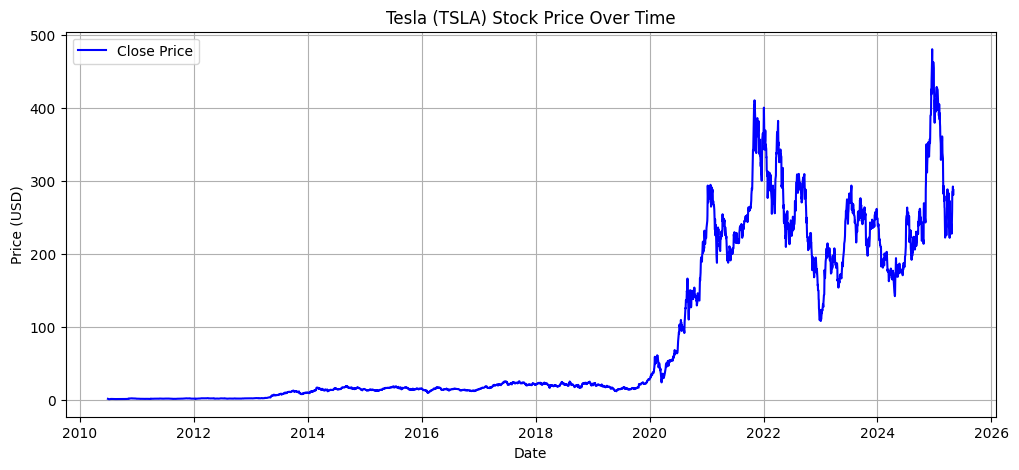

In [27]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Get Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Step 2: Reset index to display the data with proper datetime format
tesla_data.reset_index(inplace=True)

# Step 3: Plot Tesla stock data
def make_graph(data, title):
    plt.figure(figsize=(12, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to plot Tesla's stock data
make_graph(tesla_data, "Tesla (TSLA) Stock Price Over Time")


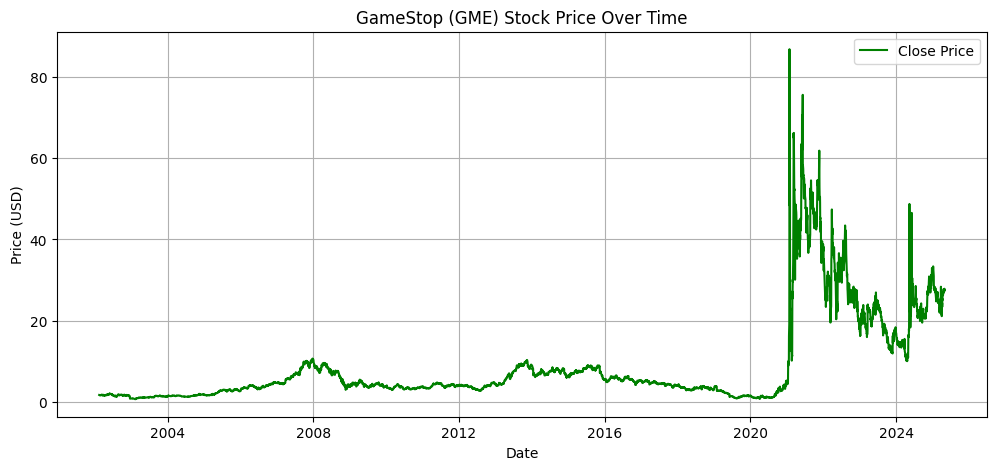

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

# Step 1: Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Step 2: Reset index to display the data with proper datetime format
gme_data.reset_index(inplace=True)

# Step 3: Plot GameStop stock data
def make_graph(data, title):
    plt.figure(figsize=(12, 5))
    plt.plot(data['Date'], data['Close'], label='Close Price', color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function to plot GameStop's stock data
make_graph(gme_data, "GameStop (GME) Stock Price Over Time")
